<a href="https://colab.research.google.com/github/sundar-nallalagappan/Coursera_NLP_assignments/blob/main/IMDB_Conv1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
print("sairam")

sairam


In [17]:
import tensorflow as tf
from tensorflow import keras

from keras.layers import Dense, Flatten, GlobalAveragePooling1D, LSTM, Bidirectional, Embedding, Conv1D
from keras.models import Sequential

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import tensorflow_datasets as tfds

In [18]:
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)
imdb

{'train': <_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'test': <_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'unsupervised': <_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [19]:
tokenizer = info.features['text'].encoder

In [20]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256

train, test = imdb['train'], imdb['test']

train_dataset = train.shuffle(BUFFER_SIZE)

train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset  = test.padded_batch(BATCH_SIZE)


In [21]:
batch_size = 1
timesteps = 20
features = 20
filters = 128
kernel_size = 5

print(f'batch_size: {batch_size}')
print(f'timesteps (sequence length): {timesteps}')
print(f'features (embedding size): {features}')
print(f'filters: {filters}')
print(f'kernel_size: {kernel_size}')

# Define array input with random values
random_input = np.random.rand(batch_size,timesteps,features)
print(f'shape of input array: {random_input.shape}')

# Pass array to convolution layer and inspect output shape
conv1d = tf.keras.layers.Conv1D(filters=filters, kernel_size=kernel_size, activation='relu')
result = conv1d(random_input)
print(f'shape of conv1d output: {result.shape}')

# Pass array to max pooling layer and inspect output shape
gmp = tf.keras.layers.GlobalMaxPooling1D()
result = gmp(result)
print(f'shape of global max pooling output: {result.shape}')

batch_size: 1
timesteps (sequence length): 20
features (embedding size): 20
filters: 128
kernel_size: 5
shape of input array: (1, 20, 20)
shape of conv1d output: (1, 16, 128)
shape of global max pooling output: (1, 128)


In [22]:
embed_size = 64
lstm1=64
lstm2=32

model = Sequential([
    Embedding(tokenizer.vocab_size, embed_size),
    Conv1D(128, 5, activation="relu"),
    GlobalAveragePooling1D(),
    Dense(64, "relu"),
    Dense(1, "sigmoid")
])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 64)          523840    
                                                                 
 conv1d_3 (Conv1D)           (None, None, 128)         41088     
                                                                 
 global_average_pooling1d_1   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
________________________________________________

In [15]:
# Set the training parameters
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

NUM_EPOCHS = 10

# Train the model
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset, batch_size=128)

Epoch 1/10
98/98 [==============================] - 377s 4s/step - loss: 0.0647 - accuracy: 0.9811 - val_loss: 0.6223 - val_accuracy: 0.8543
Epoch 2/10
98/98 [==============================] - 353s 4s/step - loss: 0.0524 - accuracy: 0.9863 - val_loss: 0.7018 - val_accuracy: 0.8512
Epoch 3/10
98/98 [==============================] - 352s 4s/step - loss: 0.0440 - accuracy: 0.9888 - val_loss: 0.7823 - val_accuracy: 0.8502
Epoch 4/10
98/98 [==============================] - 346s 4s/step - loss: 0.0386 - accuracy: 0.9904 - val_loss: 0.8202 - val_accuracy: 0.8490
Epoch 5/10
98/98 [==============================] - 354s 4s/step - loss: 0.0313 - accuracy: 0.9936 - val_loss: 0.9019 - val_accuracy: 0.8460
Epoch 6/10
98/98 [==============================] - 353s 4s/step - loss: 0.0289 - accuracy: 0.9943 - val_loss: 0.9469 - val_accuracy: 0.8430
Epoch 7/10
98/98 [==============================] - 353s 4s/step - loss: 0.0506 - accuracy: 0.9881 - val_loss: 0.8500 - val_accuracy: 0.8475
Epoch 8/10
98

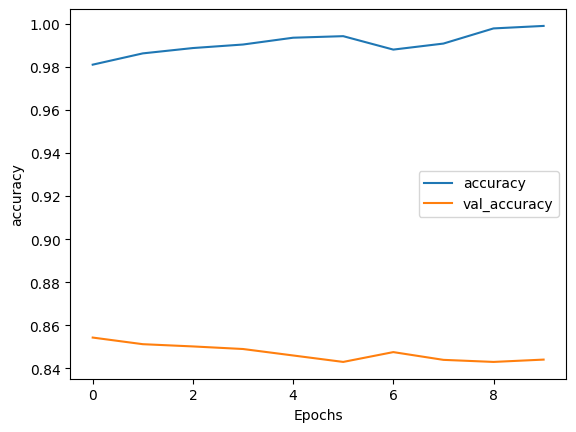

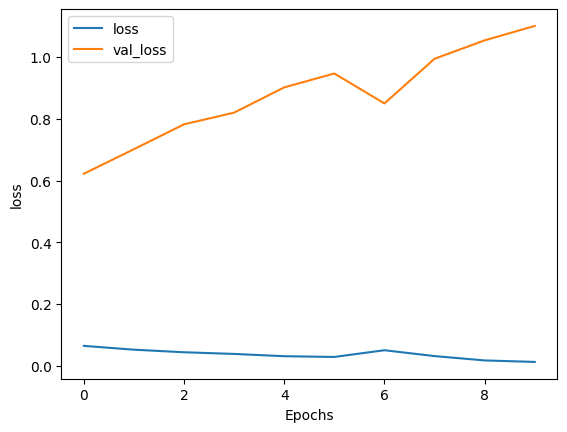

In [23]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")